# PROYECTO DE PROGRAMACION ANALITICA:

El objetivo de este proyecto es utilizar la encuesta continua de hogares ECH para obtener indicadores de la población y analizar las relaciones entre los deciles y las distintas variables. 
Dividimos el proyecto en dos: una primer parte para analizar todo el dataframe y una segunda parte donde se crearon subdataframes con la información a analizar.

# Importamos paquetes y herramientas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib import style

plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# ETL:
Comenzaremos el analisis cargando la ECH 2022 y procesando un poco el conjunto de datos base para su posterior analisis:

In [2]:
# Lo ideal es rutearlo a una carpeta de nuestra computadora y trabajarlo asi.
# ch = pd.read_csv("ECH_2022.csv")

# Load data
dfch = pd.read_csv(
    r'C:\Users\andre\Desktop\Scripts\NOTEBOOKS\DataAnalisys\DataAnalisys\ECH\DATA\ECH_2022.csv'
)

dfch.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_10028\723713993.py:5: DtypeWarning: Columns (84,179,278) have mixed types. Specify dtype option on import or set low_memory=False.
  dfch = pd.read_csv(


,ID,nper,anio,mes,GR,region,region_4,dpto,ccz,secc,...,w_tri,w_sem,estred13,nom_dpto,g260,g261,g261_1,w_ano,Loc_agr_13,Nom_loc_agr_13
0,11558,1,2022,1,7,1,1,1,1,4,...,175,87.5,4,MONTEVIDEO,NaN,NaN,NaN,38,1010,Montevideo
1,11559,1,2022,1,7,1,1,1,1,4,...,350,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo
2,11559,2,2022,1,7,1,1,1,1,4,...,350,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo
3,11560,1,2022,1,7,1,1,1,1,4,...,131,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo
4,11561,1,2022,1,7,1,1,1,1,4,...,131,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo


In [3]:
dfch['nom_dpto'].unique()

array(['MONTEVIDEO', 'ARTIGAS', 'CANELONES', 'CERRO LARGO', 'COLONIA',
       'DURAZNO', 'FLORES', 'FLORIDA', 'LAVALLEJA', 'MALDONADO',
       'PAYSANDU', 'RIO NEGRO', 'RIVERA', 'ROCHA', 'SALTO', 'SAN JOSE',
       'SORIANO', 'TACUAREMBO', 'TREINTA Y TRES', 'Montevideo', 'Artigas',
       'Canelones', 'Cerro Largo', 'Colonia', 'Durazno', 'Flores',
       'Florida', 'Lavalleja', 'Maldonado', 'Paysandú', 'Río Negro',
       'Rivera', 'Rocha', 'Salto', 'San José', 'Soriano', 'Tacuarembó',
       'Treinta y Tres'], dtype=object)

In [4]:
dfch['nom_dpto'] = dfch['nom_dpto'].str.upper()
dfch['nom_dpto'].unique()

array(['MONTEVIDEO', 'ARTIGAS', 'CANELONES', 'CERRO LARGO', 'COLONIA',
       'DURAZNO', 'FLORES', 'FLORIDA', 'LAVALLEJA', 'MALDONADO',
       'PAYSANDU', 'RIO NEGRO', 'RIVERA', 'ROCHA', 'SALTO', 'SAN JOSE',
       'SORIANO', 'TACUAREMBO', 'TREINTA Y TRES', 'PAYSANDÚ', 'RÍO NEGRO',
       'SAN JOSÉ', 'TACUAREMBÓ'], dtype=object)

In [5]:
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('SAN JOSE', 'SAN JOSÉ')
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('TACUAREMBO', 'TACUAREMBÓ')
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('PAYSANDU', 'PAYSANDÚ')
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('RIO NEGRO', 'RÍO NEGRO')
dfch['nom_dpto'].unique()

array(['MONTEVIDEO', 'ARTIGAS', 'CANELONES', 'CERRO LARGO', 'COLONIA',
       'DURAZNO', 'FLORES', 'FLORIDA', 'LAVALLEJA', 'MALDONADO',
       'PAYSANDÚ', 'RÍO NEGRO', 'RIVERA', 'ROCHA', 'SALTO', 'SAN JOSÉ',
       'SORIANO', 'TACUAREMBÓ', 'TREINTA Y TRES'], dtype=object)

# Análisis:
En primer lugar veremos como distribuye el ingreso en los datos recopilados en la encuesta.

En segundo lugar, elegimos dividir el conjunto de datos en deciles a partir del ingreso reportado en la encuesta para luego realizar un analisis descriptivo del decil mas bajo y el mas alto en principio.

Finalmente, incorporaremos otras variables como la educacion o el perfil de gasto de las familias/ individuos de la ECH.

## Primero veremos como se distribuyen los valores del ingreso en nuestro dataset:

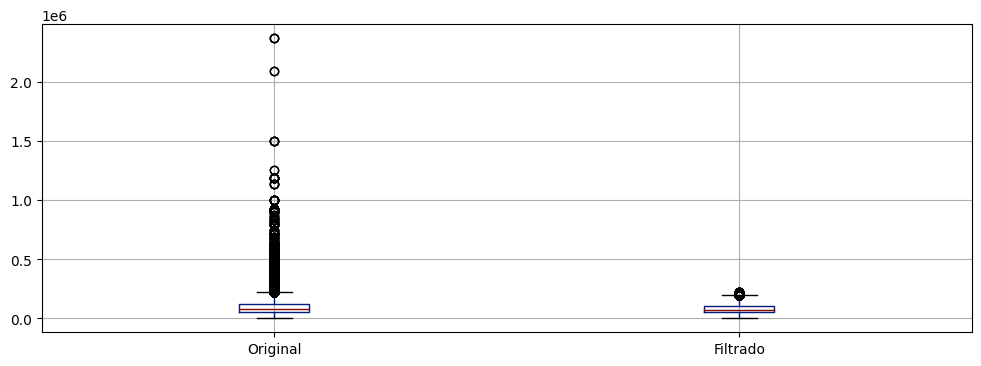

In [6]:
# Calculamos el rango intercuartilico (RI):
Q1 = dfch['ht11'].quantile(0.25)
Q3 = dfch['ht11'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los limites inferiores:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los datos atipicos:
dfch_filtered = dfch[(dfch['ht11'] >= lower_bound) & (dfch['ht11'] <= upper_bound)]

# Creamos un nuevo dataframe con los datos filtrados y sin filtrar (datos atipicos):
data = pd.DataFrame({'Original': dfch['ht11'], 'Filtrado': dfch_filtered['ht11']})

# Creamos un diagrama de caja para cada dataframe:
data.boxplot()

plt.show()


Podemos observar que la distribucion de ingresos de nuestro dataset tiene muchos outliers (Datos atipicos, son valores "extremos", muy lejanos de la media de ingresos de la ECH).
En el ejemplo del codigo de arriba calculamos los cuartiles y filtramos los valores que rebasen los limites que fijamos (estadisticamente siempre es +/- 1.5 multiplicado por el rango intercuartilico). Para mayor comodidad grafica lo que haremos es filtrar del grafico estos valores y solo quedarnos con la caja y los "bigotes":

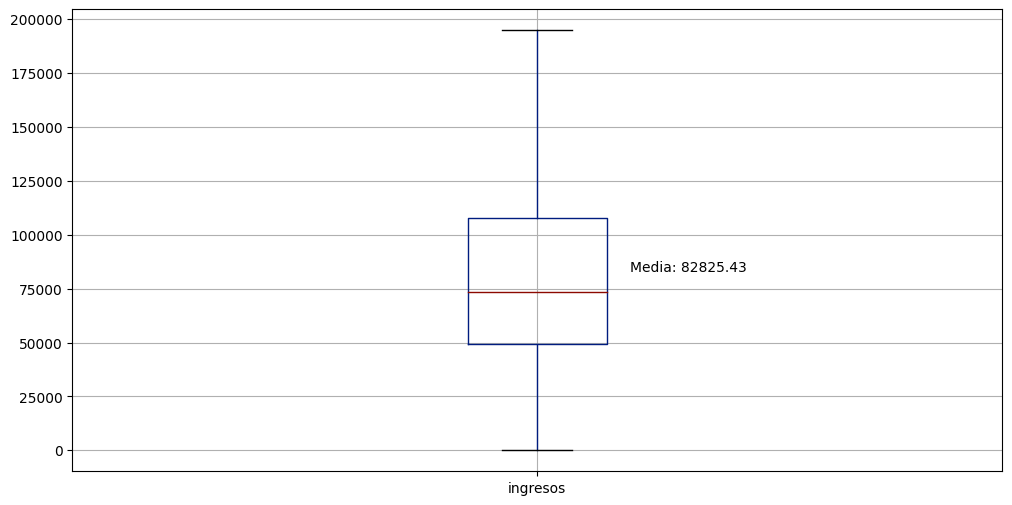

In [7]:
# Seteamos configuracion del grafico:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 6)

# Calculamos el RI:
Q1 = dfch['ht11'].quantile(0.25)
Q3 = dfch['ht11'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los limites superiores e inferiores para filtrar datos atipicos:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los datos atipicos:
dfch_filtered = dfch[(dfch['ht11'] >= lower_bound) & (dfch['ht11'] <= upper_bound)]

# Creamos nuestro diagrama de caja sin datos atipicos:
dfch_filtered.boxplot(column='ht11', showfliers=False)

# Seteamos etiquetas
plt.xticks([1], ['ingresos'])

# Calculamos la media de los valores filtrados:
mean_value = dfch_filtered['ht11'].mean()

# Agregamos una nota con el valor de la media:
plt.text(1.1, mean_value, f'Media: {mean_value:.2f}')

plt.show()


In [8]:
min_i = dfch['ht11'].min()
media_i = dfch['ht11'].mean()
max_i = dfch['ht11'].max()

print(f"El ingreso minimo de la ECH es: {min_i}, mientras que la media es: {media_i} y el valor maximo: {max_i}")


El ingreso minimo de la ECH es: 0.0, mientras que la media es: 98380.48681443256 y el valor maximo: 2366721.1


Como podemos ver la media del ingreso sin datos atipicos se situa muy cercana a los 83.000 UYU mientras que si analizamos la media de toda la ECH es mas cercana a los 100.000 UYU. Esto es porque los valores extremos "tiran" hacia arriba el valor de la media.

En los proximos aparatados profundizaremos mas en como se distribuye el ingreso respecto a diversas variables.

## En segundo lugar generaremos los deciles para luego cruzar los ingresos por decil con otras variables:

In [9]:
# Creamos deciles a partir del ingreso:
dfch.sort_values(by='ht11', ascending=True)
dfch['d_1'] = pd.qcut(dfch['ht11'], 10, labels=False,)

dfch['d_1'].astype(str)
decil = []

for i in dfch['d_1']:
    result = (i+1)
    decil.append(result)

dfch['d_1'] = decil
dfch['d_1'] = dfch['d_1'].astype(int)

dfch.head()

,ID,nper,anio,mes,GR,region,region_4,dpto,ccz,secc,...,w_sem,estred13,nom_dpto,g260,g261,g261_1,w_ano,Loc_agr_13,Nom_loc_agr_13,d_1
0,11558,1,2022,1,7,1,1,1,1,4,...,87.5,4,MONTEVIDEO,NaN,NaN,NaN,38,1010,Montevideo,4
1,11559,1,2022,1,7,1,1,1,1,4,...,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo,9
2,11559,2,2022,1,7,1,1,1,1,4,...,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo,9
3,11560,1,2022,1,7,1,1,1,1,4,...,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo,10
4,11561,1,2022,1,7,1,1,1,1,4,...,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo,8


In [10]:
print(f"La cantidad de registros del dataset es: {dfch['ID'].count()}. Y la suma de numero de personas: {dfch['nper'].sum()}.")

La cantidad de registros del dataset es: 55056. Y la suma de numero de personas: 114567.


La cantidad de registros del dataset refiere a la cantidad de hogares en la ECH, el campo 'ID' es el hogar encuestado mientras que el campo 'nper' son las personas encuestadas dentro de ese hogar. Resulta interesante ver como queda la distribucion de los hogares encuestados en la ECH por decil:

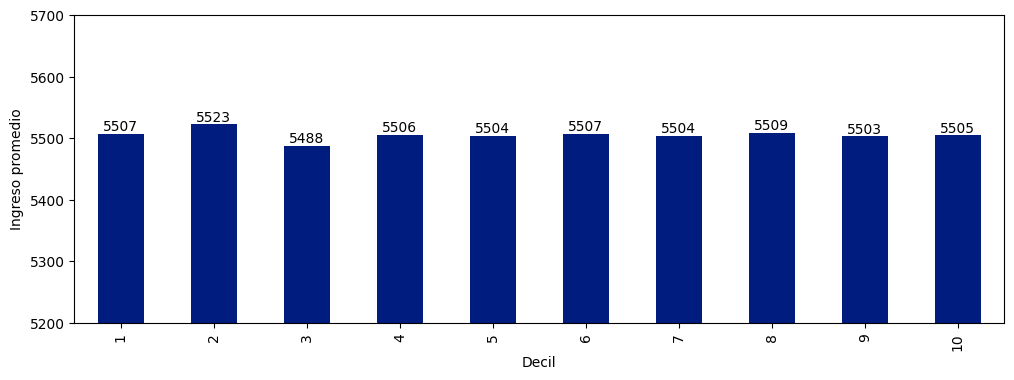

In [11]:
# Seteamos configuracion del grafico:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

# Contamos la cantidad de gente en cada decil definido:
dfch_count = dfch.groupby('d_1')['ht11'].count()
ax = dfch_count.plot.bar()

# Agregamos etiquetas a cada decil:
for i in ax.containers:
    ax.bar_label(i)

# Setteamos limites superiores e inferiores del eje y:
ax.set_ylim(bottom=5200, top=5700)

# Setteamos etiquetas de los ejes:
plt.xlabel('Decil')
plt.ylabel('Ingreso promedio')

# Show the plot
plt.show()

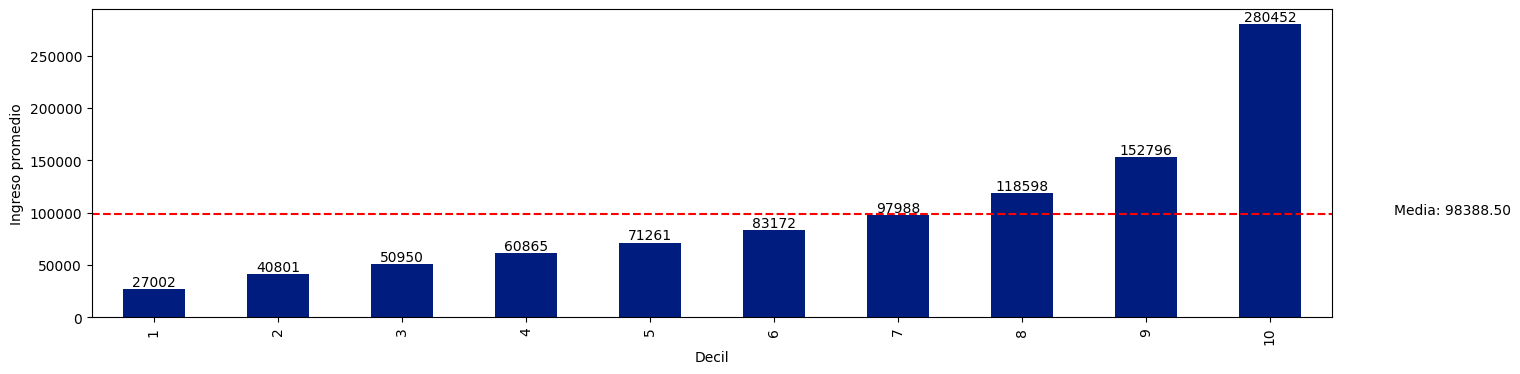

In [12]:
# Seteamos configuracion del grafico:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (16, 4)

# Vemos la distribucion de ingresos para los deciles definidos:
dfch['ht11'] = dfch['ht11'].astype(float)
dfch_d_1 = dfch.groupby('d_1')['ht11'].mean().round()
ax = dfch_d_1.plot.bar()

ax.axhline(dfch_d_1.mean(), color='r', linestyle='--')

# Agregamos etiquetas a cada decil:
for i in ax.containers:
    ax.bar_label(i)

# Calculamos la media:
mean_value = dfch_d_1.mean()

# Agregamos una etiqueta de texto para la media calculada:
plt.text(len(dfch_d_1), mean_value, f'Media: {mean_value:.2f}')

#Setteamos etiquetas de los ejes:
plt.xlabel('Decil')
plt.ylabel('Ingreso promedio')

# Show the plot
plt.show()

## Distribucion del ingreso por departamentos:

En este apartado veremos como se distribuye el ingreso en los departamentos del pais. Tomaremos los datos agrupados por departamento y discutiremos en funcion de los resultados hallados.

In [13]:
# Analizamos la distribucion del ingreso medio por departamento definiendo un subconjunto de datos agrupados:
mean_income = dfch.groupby('nom_dpto')['ht11'].mean().round(2)

# Orden ascendente por ingreso medio
print(mean_income.sort_values())

# # Orden alfabetico de nom_dpto
# print(mean_values)

nom_dpto
ARTIGAS            62875.43
TACUAREMBÓ         64359.40
CERRO LARGO        65575.97
TREINTA Y TRES     66128.62
RIVERA             67714.15
ROCHA              69058.03
LAVALLEJA          69604.95
DURAZNO            69855.41
FLORIDA            73779.11
PAYSANDÚ           77534.44
RÍO NEGRO          80897.90
FLORES             82540.57
COLONIA            82631.21
MALDONADO          84139.45
SAN JOSÉ           84484.81
SORIANO            89319.99
SALTO              91812.03
CANELONES         101045.26
MONTEVIDEO        126102.68
Name: ht11, dtype: float64


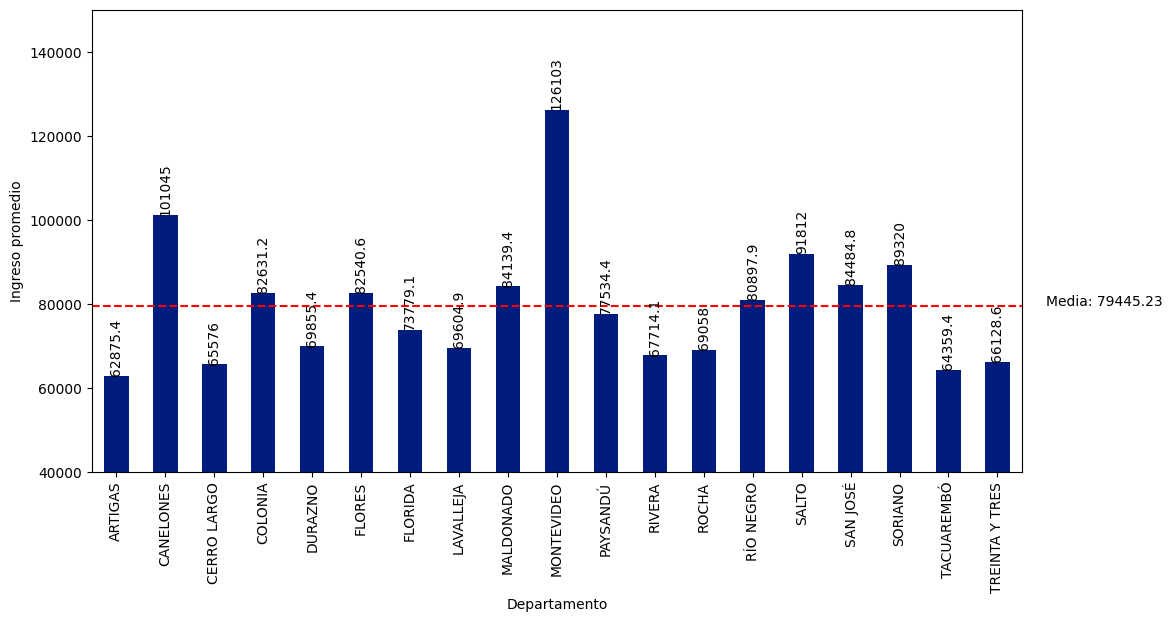

In [14]:
# Primero seteamos parametros para el grafico:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 6)

# Calculamos la media del ingreso por departamento:
mean_income = dfch.groupby('nom_dpto')['ht11'].mean().round(2)

# Creamos un grafico de barras:
ax = mean_income.plot(kind='bar')

# Agregamos etiquetas a cada barra:
for container in ax.containers:
    ax.bar_label(container, label_type='edge', rotation=90)

# Setteamos limites superiores e inferiores del eje y:
ax.set_ylim(bottom=40000, top=150000)

# Calculamos la media del subconjunto de datos:
overall_mean = mean_income.mean()

# Agregamos una linea horizontal con la media:
ax.axhline(overall_mean, color='red', linestyle='--')

# Agregamos una etiqueta para la media:
plt.text(len(mean_income), overall_mean, f'Media: {overall_mean:.2f}')

# Setteamos las etiquetas de los ejes:
plt.xlabel('Departamento')
plt.ylabel('Ingreso promedio')

plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_10028\903327170.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_values))


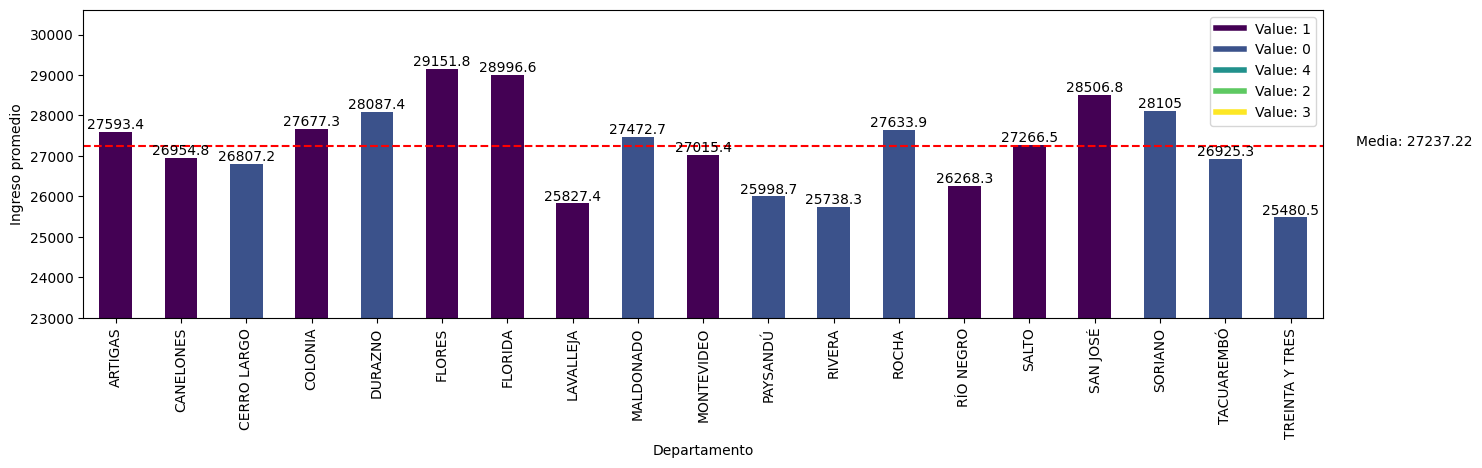

In [15]:
# Primero seteamos parametros para el grafico:
plt.rcParams["figure.figsize"] = (16, 4)

# Definimos un subconjunto de datos para el quintil mas pobre:
poor_people = dfch[dfch['d_1'] == 1]

# Agrupamos por departamento y graficamos:
poor_people_g = poor_people.groupby('nom_dpto')['ht11'].mean()

# Buscamos los valores unicos de la columna 'f70'definida como cantidad de trabajos (En numero):
unique_values = poor_people['f70'].unique()

# Creamos un mapa de colores con tantos colores como valores unicos:
cmap = plt.cm.get_cmap('viridis', len(unique_values))

# Mapeamos los colores para cada una de las columnas:
value_to_color = {value: cmap(i) for i, value in enumerate(unique_values)}

# Creamos un mapa de colores para las barras basandonos en los valores de la columna 'f70':
colors = poor_people['f70'].map(value_to_color)

ax_pp = poor_people_g.plot.bar(color=colors)
ax_pp.axhline(poor_people_g.mean(), color='r', linestyle='--')

# Agregamos etiquetas a cada columna:
for i in ax_pp.containers:
    ax_pp.bar_label(i)

# Creamos etiquetas de leyenda personalizadas:
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Value: {value}') for value, color in value_to_color.items()]

# Agregamos una leyenda:
ax_pp.legend(handles=legend_elements, loc='upper right')

# Calculamos la media:
mean_value = poor_people_g.mean()

# Agregamos una anotacion con el valor de la media:
plt.text(len(poor_people_g), mean_value, f'Media: {mean_value:.2f}')

# Setteamos los limites del eje y:
ax_pp.set_ylim(bottom=23000)

plt.xlabel('Departamento')
plt.ylabel('Ingreso promedio')

plt.show()


En este grafico podemos ver cual es la media de ingreso para el decil mas bajo de la poblacion de nuestro pais. A simple vista tenemos 9 departamentos que tienen ingresos en promedio menores a la media del total del decil, siendo el que tiene el ingreso medio mas bajo Rio Negro y el mas alto Flores.

Adicionalmente podemos ver cual es la situacion de empleo del decil mas bajo en cada departamento, el campo: 'f70' es un variable definida como la cantidad de trabajo/s que tienen las personas. En el grafico podemos ver que las personas tienen 1 o 0 trabajos, donde en el caso del valor 0 podriamos inferir que no tienen un empleo formal estable pero estan empleados informalmente.

C:\Users\andre\AppData\Local\Temp\ipykernel_10028\196800786.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_values))


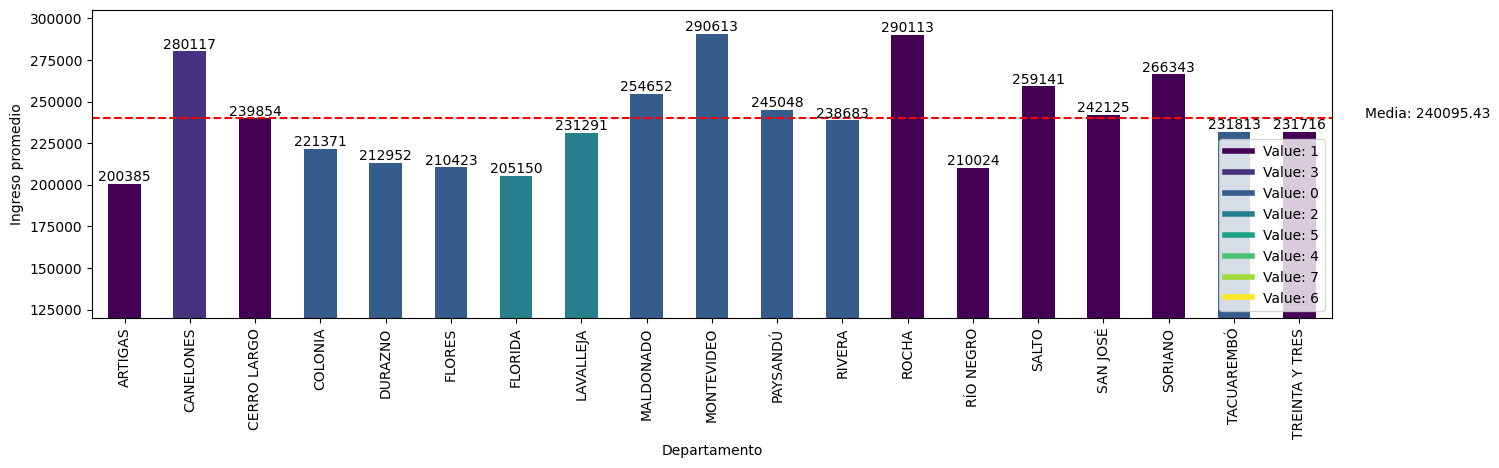

In [16]:
# Definimos un subconjunto de datos para el decil mas rico:
rich_people = dfch[dfch['d_1'] == 10]

# Agrupamos por departamento y graficamos:
rich_people_g = rich_people.groupby('nom_dpto')['ht11'].mean()

# Buscamos los valores unicos de la columna 'f70' definida como cantidad de trabajos (En numero):
unique_values = rich_people['f70'].unique()

# Creamos un mapa de colores con tantos colores como valores unicos:
cmap = plt.cm.get_cmap('viridis', len(unique_values))

# Mapeamos los colores para cada una de las columnas:
value_to_color = {value: cmap(i) for i, value in enumerate(unique_values)}

# Creamos un mapa de colores para las barras basandonos en los valores de la columna 'f70':
colors = rich_people['f70'].map(value_to_color)

ax_rp = rich_people_g.plot.bar(color=colors)
ax_rp.axhline(rich_people_g.mean(), color='r', linestyle='--')

# Agregamos etiquetas a cada columna:
for i in ax_rp.containers:
    ax_rp.bar_label(i)

# Creamos etiquetas de leyenda personalizadas:
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Value: {value}') for value, color in value_to_color.items()]

# Agregamos una leyenda:
ax_rp.legend(handles=legend_elements, loc='lower right')

# Calculamos la media:
mean_value = rich_people_g.mean()

# Agregamos una anotacion con el valor de la media:
plt.text(len(rich_people_g), mean_value, f'Media: {mean_value:.2f}')

# Setteamos limites del eje y:
ax_rp.set_ylim(bottom=120000)

plt.xlabel('Departamento')
plt.ylabel('Ingreso promedio')

plt.show()

Cuando analizamos el decil mas alto y la cantidad de trabajo que tienen las personas podemos observar que tienen de 1 a 3 trabajos.

## Definimos variables referentes al nivel de educacion por decil:
En este apartado analizaremos el comportamiento del ingreso por deciles y niveles educativos alcanzados.

In [17]:
# Definimos un subconjunto de datos:
df_ed = pd.DataFrame(
    dfch,
    columns= [
        'ID',
        'nper',
        'anio',
        'mes',
        'nom_dpto',
        'd_1',
        'ht11',
        'e197_1',
        'e201_1a',
        'e201_1c',
        'e201_1d', 
        'e218_1',
        'e221_1',
        'e224_1'
    ]
)

# Definimos los nuevos nombres
ed_columns = ['ID',
    'nper',
    'anio',
    'mes',
    'nom_dpto',
    'decil',
    'ingreso',
    'edprim',
    'edcbas',
    'edbachill',
    'edutu',
    'edtuniv',
    'edtnouniv',
    'edtercpos']

# Definimos los nombres antiguos
columns= [
    'ID',
    'nper',
    'anio',
    'mes',
    'nom_dpto',
    'd_1',
    'ht11',
    'e197_1',
    'e201_1a',
    'e201_1c',
    'e201_1d',
    'e218_1',
    'e221_1',
    'e224_1'
]

#Creamos un diccionarios que mapee los nombres viejos y los nuevos:
column_mapping = dict(zip(columns, ed_columns))

# Renombramos las columnas del subconjunto de datos:
df_ed = df_ed.rename(columns=column_mapping)

df_ed.head()

,ID,nper,anio,mes,nom_dpto,decil,ingreso,edprim,edcbas,edbachill,edutu,edtuniv,edtnouniv,edtercpos
0,11558,1,2022,1,MONTEVIDEO,4,63189.480000,1,1,1,0,2,0,0
1,11559,1,2022,1,MONTEVIDEO,9,150378.960000,1,1,1,0,2,0,0
2,11559,2,2022,1,MONTEVIDEO,9,150378.960000,1,1,1,0,0,0,0
3,11560,1,2022,1,MONTEVIDEO,10,198606.146667,1,1,2,0,0,0,0
4,11561,1,2022,1,MONTEVIDEO,8,113189.480000,1,1,1,0,1,0,0


En primer lugar analizaremos la distribucion de los niveles educativos alcanzados por las personas de la ECH:

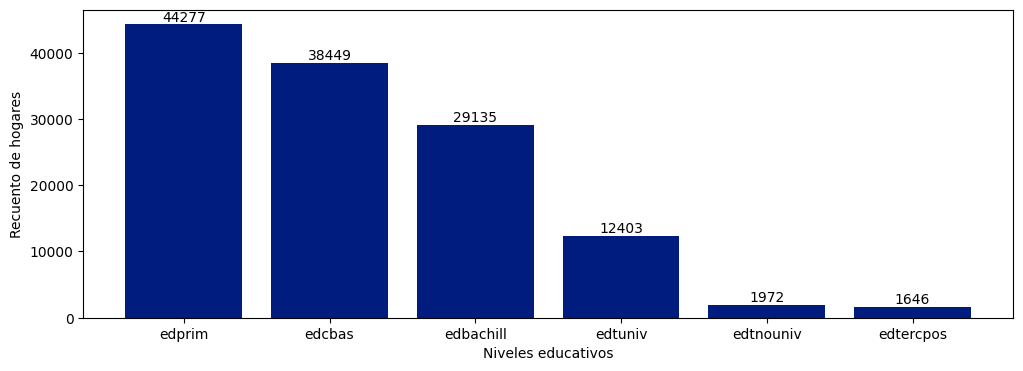

In [18]:
# Setteamos parametros graficos:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

# Filtramos las columnas por nivel educativo alcanzado:
mask = (df_ed['edprim'] == 1) | (df_ed['edcbas'] == 1) | (df_ed['edbachill'] == 1) | (df_ed['edutu'] == 1) | (df_ed['edtuniv'] == 1) | (df_ed['edtnouniv'] == 1) | (df_ed['edtercpos'] == 1)
filtered_df = df_ed[mask]

# Conntamos los ID's por cada nivel educativo alcanzado
cols = ['edprim', 'edcbas', 'edbachill', 'edtuniv', 'edtnouniv', 'edtercpos']
counts = [filtered_df[col].sum() for col in cols]

# Graficamos los conteos:
plt.bar(cols, counts)
plt.xlabel('Niveles educativos')
plt.ylabel('Recuento de hogares')

# Agregamos etiquetas:
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Como podemos observar a traves del recuento de hogares por nivel educativo alcanzado a medida que se avanza en terminos de niveles educativos tenemos cada vez menos personas en los niveles de educacion profesional, profesional-superior.

Ahora observaremos que sucede en el caso de la educacion primaria, cuantos hogares alcanzan dicha educacion efectivamente por departamento:

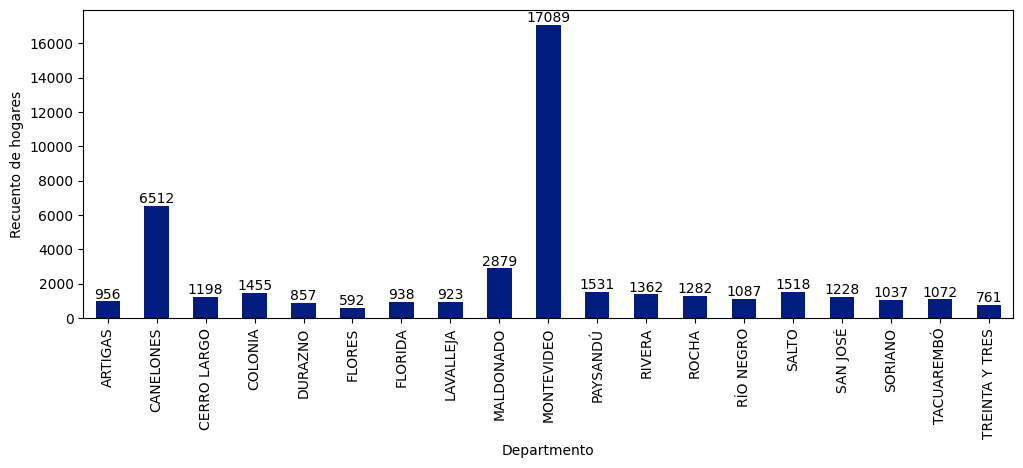

In [19]:
# Setteamos parametros graficos:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

# Filtramos los datos:
mask = df_ed['edprim'] == 1
filtered_df = df_ed[mask]

# Contamos las personas por departamento:
counts = filtered_df.groupby('nom_dpto')['ID'].count()

# Graficamos los resultados:
counts.plot(kind='bar')
plt.xlabel('Departmento')
plt.ylabel('Recuento de hogares')

# Agregamos etiquetas:
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


En este gráfico podemos ver una gran diferencia entre la educación primaria en Montevideo con respecto a los departamentos del interior. En particular si consideramos al interior sin Canelones vemos que Maldonado es el departamento con mayor nivel luego de Canelones dejando al resto del interior en niveles mas bajos en términos de hogares con educación primaria completa.

Ahora veremos como es la distribución de hogares por decil según el nivel educativo alcanzado:

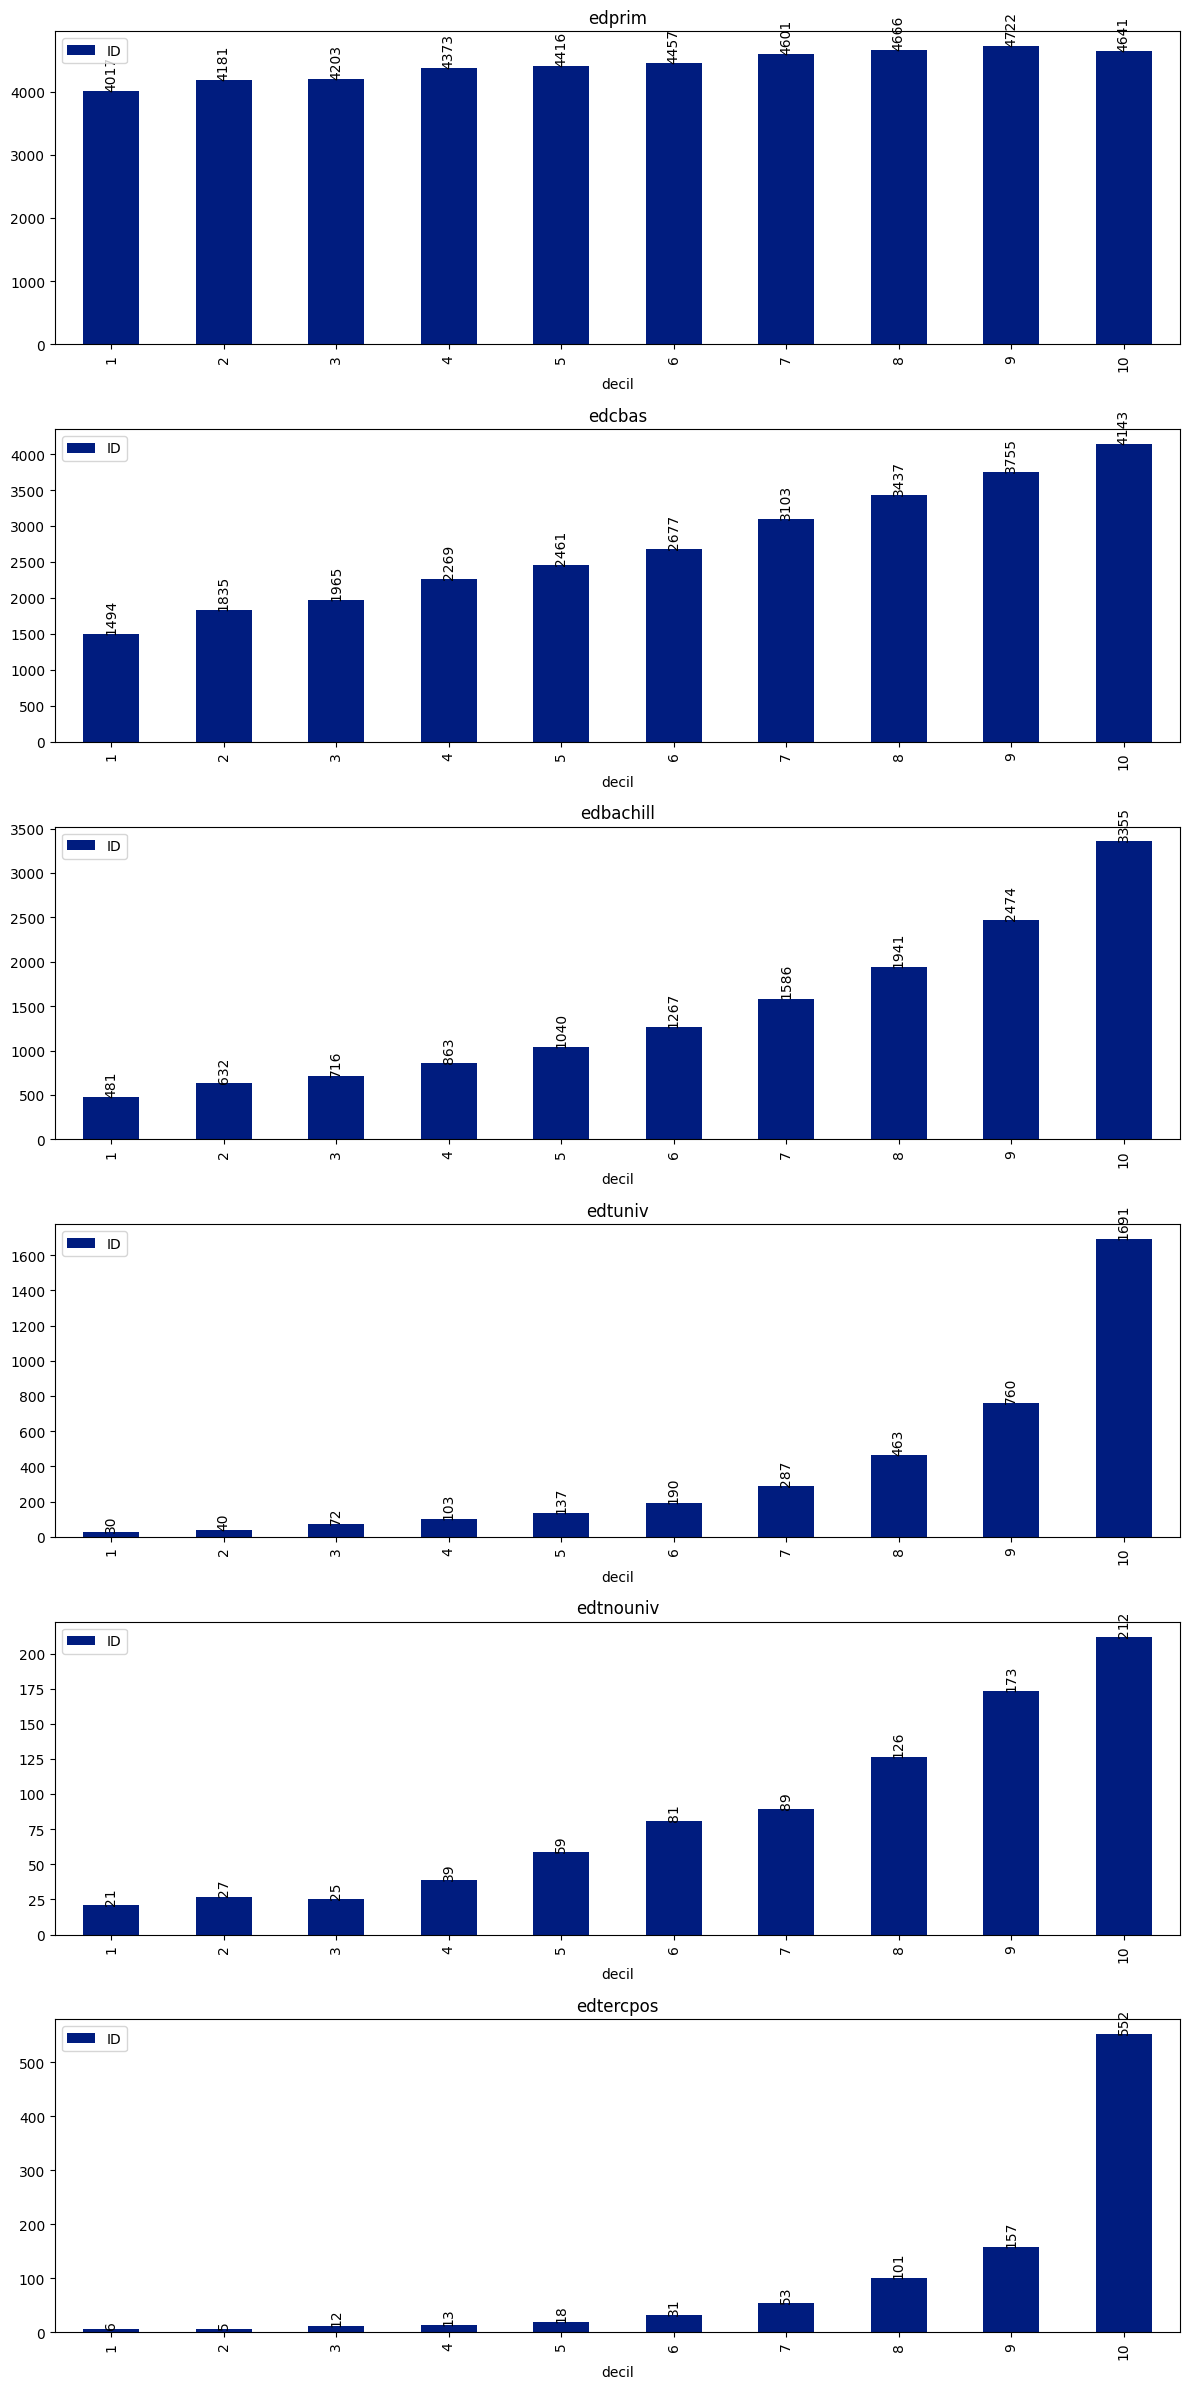

In [20]:
# Setteamos parametros graficos:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams['figure.figsize'] = (12, 6)

cols = ['edprim', 'edcbas', 'edbachill', 'edtuniv', 'edtnouniv', 'edtercpos']

# Creamos una lista para guardar los resultados:
data_list = []

# Filtramos los datos para cada columna definida en 'cols' y guardamos los datos en una lista:
for col in cols:
    # Filtramos los datos en la columna actual:
    mask = df_ed[col] == 1
    filtered_df = df_ed[mask]
    
    # Agrupamos por decil y contamos los hogares por decil:
    data = filtered_df.groupby('decil')['ID'].count()
    
    # Checkeamos que haya datos para graficar:
    if not data.empty:
        data_list.append((col, data))

# Creamos una figura con varios graficos para cada columna no-vacia en la lista de columnas definida:
fig, axs = plt.subplots(nrows=len(data_list), figsize=(12, 4*len(data_list)))

for i, (col, data) in enumerate(data_list):
    # Graficamos el recuento en cada sub-grafico:
    data.plot(kind='bar', ax=axs[i], title=col)
    
    # Agregamos el valor en cada columna:
    for container in axs[i].containers:
        axs[i].bar_label(container, label_type='edge', rotation=90)
    
    # Setteamos los limites inferiores:
    axs[i].set_ylim(bottom=0)
    
    # Movemos la leyenda a la izquierda:
    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

En estos graficos podemos obvservar como a medida que se avanza adelante en niveles educativos hay cada vez menos hogares en los deciles mas bajos y mas hogares se acumulan en los deciles mas altos. Podemos inferir que hay una relacion positiva entre el nivel educativo alcanzado en el hogar y el nivel de ingreso del hogar.

### Definimos variables referentes a la alimentacion y sustento por decil:

En este apartado elegimos como variables relevantes a analizar: gasto en alimentacion, gasto en vivienda, gasto en transporte, gasto en salud, gasto en la educacion de los hijos y la cantidad de hijos.

generaremos un nuevo subset de datos para este analisis:

In [21]:
# Definimos un subconjunto de datos para los gastos:
df_g = pd.DataFrame(
    dfch,
    columns= [
        'ID',
        'nper',
        'anio',
        'mes',
        'nom_dpto',
        'd_1',
        'ht11',
        'eg_ps3',
        'eg_ps4',
        'eg_ps5',
        'eg_ps6',
        'eg_ps7',
        'eg_ps8',
        'e186_2'
    ]
)

# Definimos los nuevos nombres
g_columns = [
    'ID',
    'nper',
    'anio',
    'mes',
    'nom_dpto',
    'decil',
    'ingreso',
    'g_alim',
    'g_viv',
    'g_vest',
    'g_transp',
    'g_salud',
    'g_ed_hijos',
    'cant_h'
]

# Definimos los nombres antiguos
columns= [
    'ID',
    'nper',
    'anio',
    'mes',
    'nom_dpto',
    'd_1',
    'ht11',
    'eg_ps3',
    'eg_ps4',
    'eg_ps5',
    'eg_ps6',
    'eg_ps7',
    'eg_ps8',
    'e186_2'
]

#Creamos un diccionarios que mapee los nombres viejos y los nuevos:
column_mapping = dict(zip(columns, g_columns))

# Renombramos las columnas del subconjunto de datos:
df_g= df_g.rename(columns=column_mapping)

df_g.head()

,ID,nper,anio,mes,nom_dpto,decil,ingreso,g_alim,g_viv,g_vest,g_transp,g_salud,g_ed_hijos,cant_h
0,11558,1,2022,1,MONTEVIDEO,4,63189.480000,2,2,2,2,2,4,0
1,11559,1,2022,1,MONTEVIDEO,9,150378.960000,2,2,2,2,2,4,0
2,11559,2,2022,1,MONTEVIDEO,9,150378.960000,2,2,2,2,2,4,0
3,11560,1,2022,1,MONTEVIDEO,10,198606.146667,2,2,2,2,2,4,0
4,11561,1,2022,1,MONTEVIDEO,8,113189.480000,3,3,3,2,3,4,0


Comenzaremos viendo como se distribuyen la cantidad de hijos por decil, nuestra intencion es analizar en que hogares se acumula mayor cantidad de hijos:

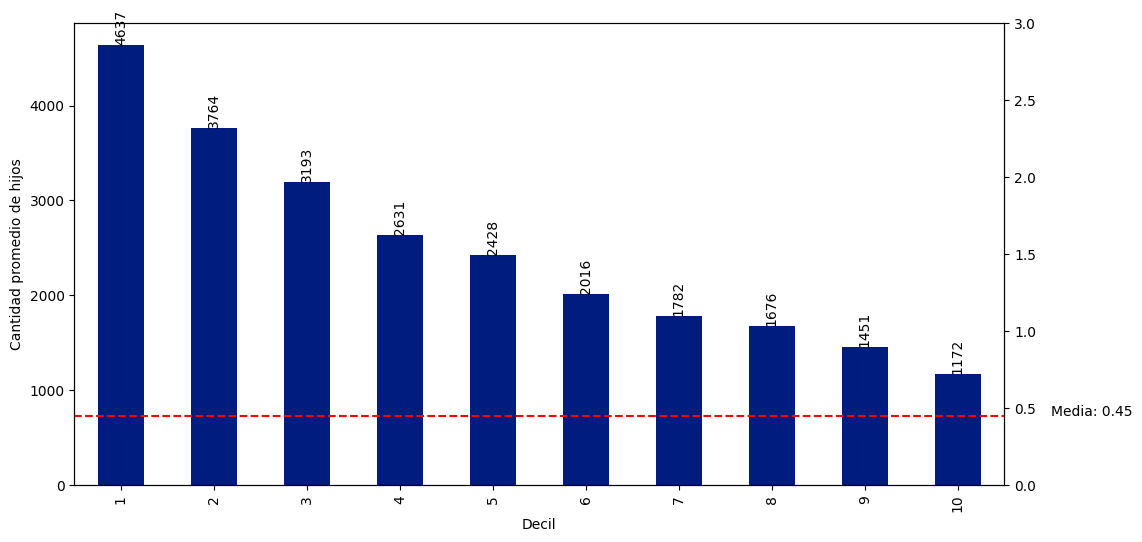

In [22]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

mean_hijos =  df_g.groupby('decil')['cant_h'].sum()

# Graficamos las barras con su escala en el eje y de la izquierda:
mean_hijos.plot(kind='bar', ax=ax1)

# Setteamos las leyendas del eje de la izquierda y del eje x:
ax1.set_xlabel('Decil')
ax1.set_ylabel('Cantidad promedio de hijos')

# Agregamos etiquetas a cadda barra:
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', rotation=90)

# Calculamos la media del subconjunto de datos:
mean_h = df_g['cant_h'].mean()

# Setteamos los limites del eje y de la derecha:
ax2.set_ylim(bottom=0, top=3)

# Agregamos una linea con la media del subconjunto de datos:
ax2.axhline(mean_h, color='red', linestyle='--')

# Agregamos una etiqueta para la media del subconjunto de datos:
plt.text(len(mean_hijos), mean_h, f'Media: {mean_h:.2f}')

plt.show()


Como podemos ver, en los deciles más bajos es donde hay mayor concentración de cantidad de hijos en los hogares, mientras que en los deciles más altos la cantidad de hijos en el hogar disminuye a menos de la cuarta parte. Es decir que por cada hijo en un hogar de un decil más alto puede haber hasta 4 hijos en un hogar del decil más bajo.

Para profundizar un poco más en la situación de los hogares por decil, en el próximo código veremos como se comporta la cobertura de los principales rubros de gasto en los hogares en los distintos deciles:

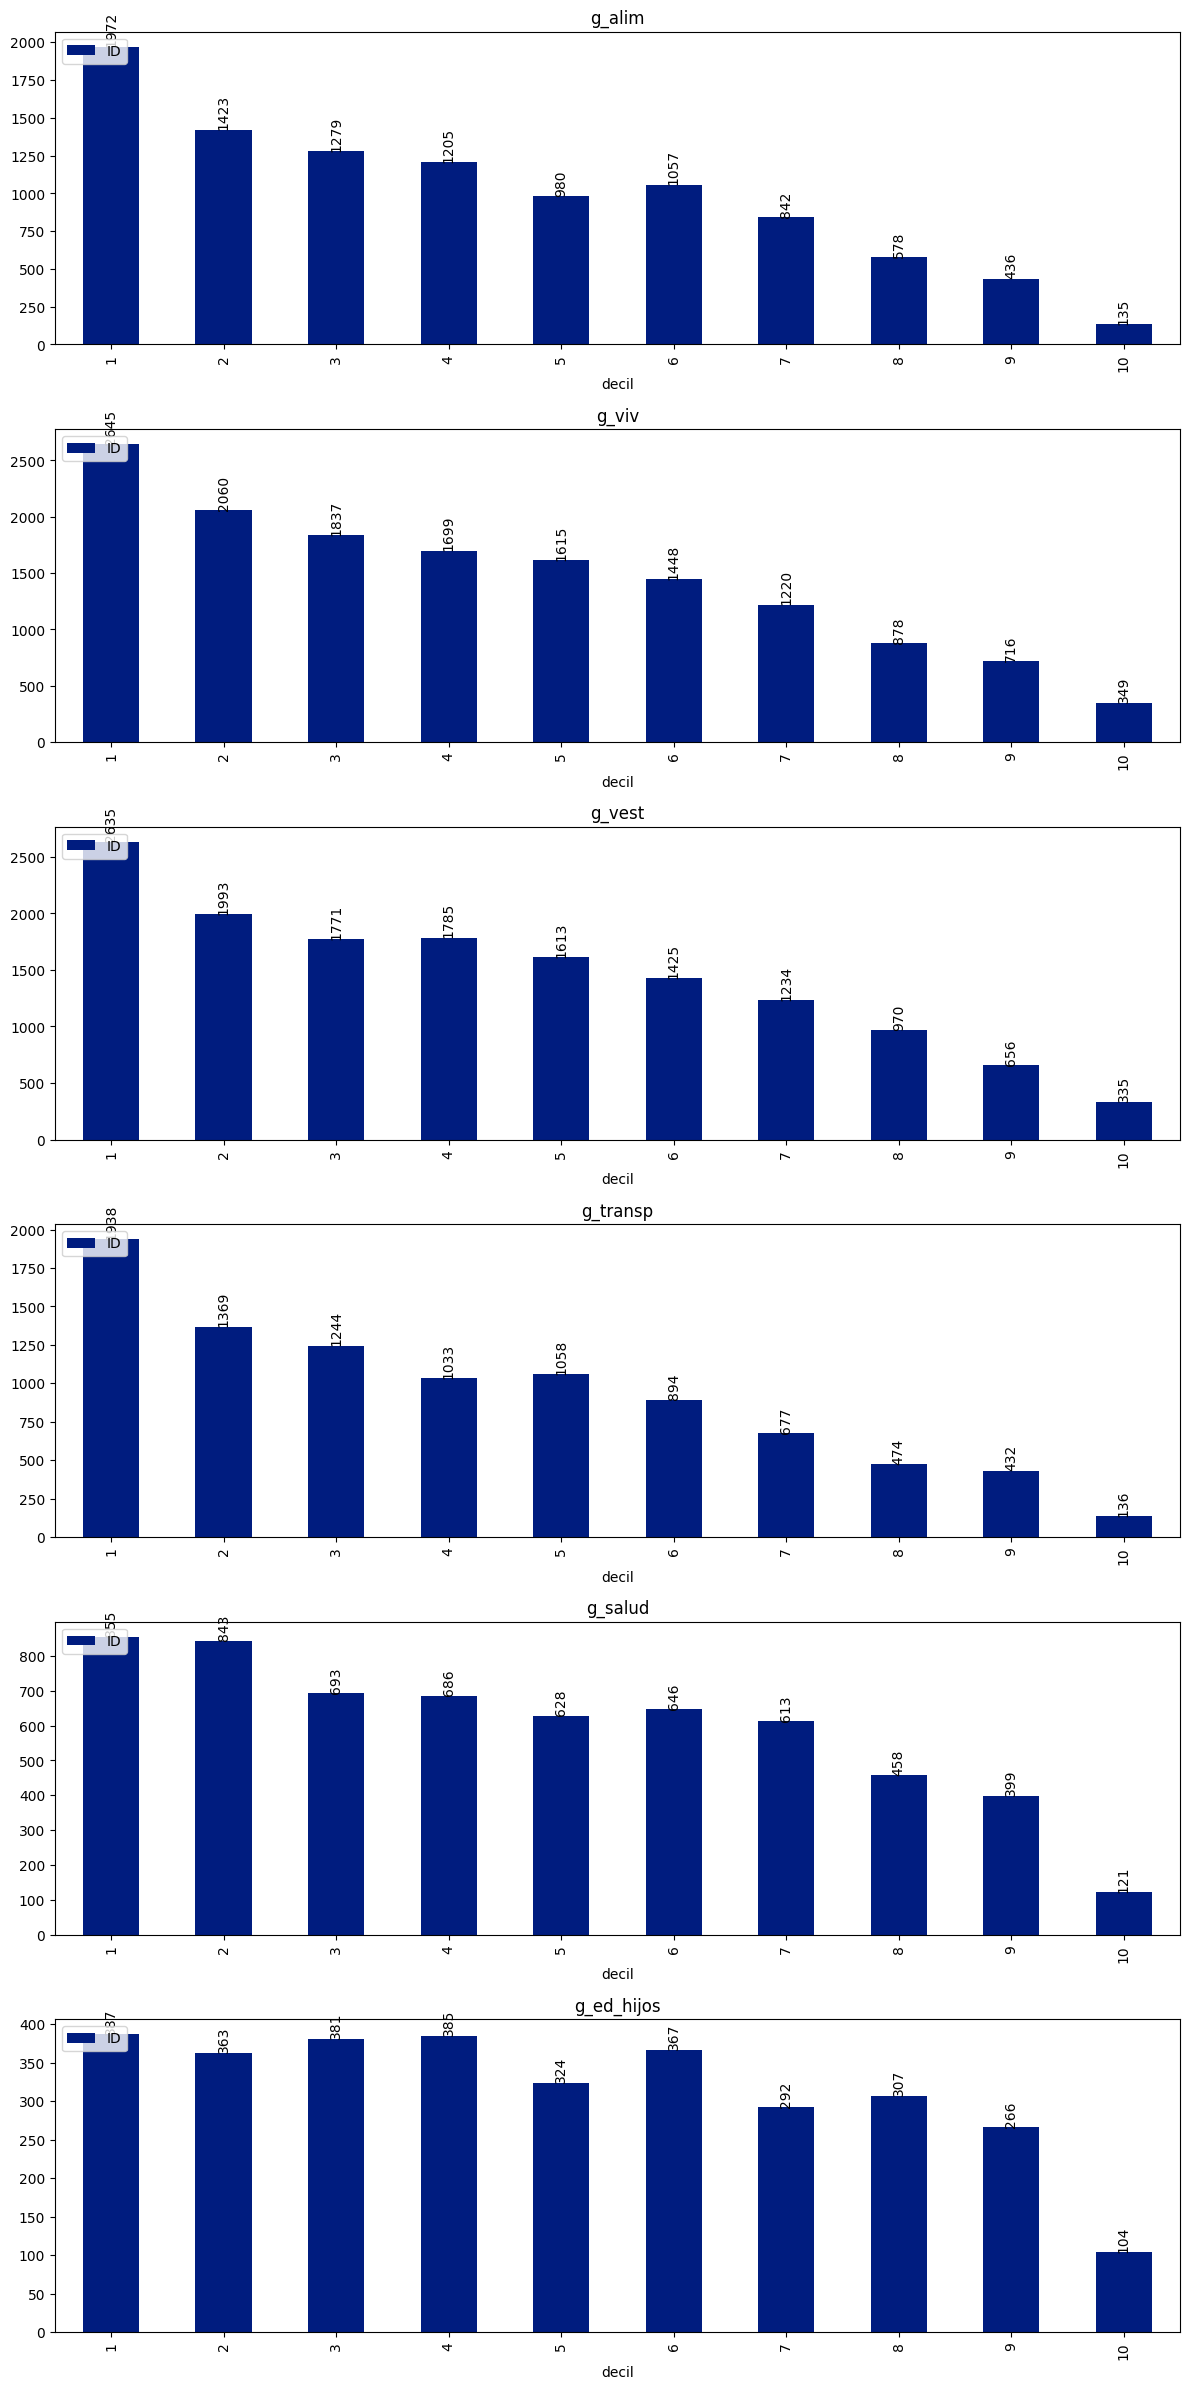

In [23]:
# Definimos las columnas con las que vamos a trabajar:
cols = ['g_alim', 'g_viv', 'g_vest', 'g_transp', 'g_salud', 'g_ed_hijos']

# Creamos una lista para guardar los resultados:
data_list = []

# Filtramos los datos para cada columna definida en 'cols' y guardamos los datos en una lista:
for col in cols:
    # Filtramos los datos en la columna actual:
    mask = df_g[col] == 1
    filtered_df = df_g[mask]
    
    # Agrupamos por decil y contamos los hogares por decil:
    data = filtered_df.groupby('decil')['ID'].count()
    
    # Checkeamos que haya data para graficar:
    if not data.empty:
        data_list.append((col, data))

# Creamos una figura con varios graficos para cada columna no-vacia en la lista de columnas definida:
fig, axs = plt.subplots(nrows=len(data_list), figsize=(12, 4*len(data_list)))

for i, (col, data) in enumerate(data_list):
    # Graficamos el recuento en cada sub-grafico:
    data.plot(kind='bar', ax=axs[i], title=col)
    
    # Agregamos el valor en cada columna:
    for container in axs[i].containers:
        axs[i].bar_label(container, label_type='edge', rotation=90)
    
    # Setteamos los limites inferiores:
    axs[i].set_ylim(bottom=0)
    
    # Movemos la leyenda a la izquierda:
    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

En los gráficos recientes, se gráfico la distribcuión de los gastos de cada decil con la variable de "gasto insuficiente". Se puede ver como en los deciles más bajos, es mayor el recuento de hogares que gastan menos. Se puede cambiar el filtro de: "mask = df_g[col] == 1" por el valor = 2,  que sería la cobertura suficiente o por: = 3 que sería una cobertura más que suficiente. Si eligieramos gráficar la variable más que suficiente, los gráficos se verían al revés (mayor recuento de hogares en los mayores deciles).
Lo interesante es ver que ocurre cuando el filtro en mask toma los valores 1 y 3 ya que hay una relacion inversa entre el decil de partida y la cobertura del gasto en cuestion. Si analizamos filtrando por mask == 1 tenemos que hay una mayor cantidad de hogares en los deciles mas bajos que no alcanzan la cobertura suficiente de las variables de gastos que elegimos para el analisis, pero que a medida que avanzamos de decil la cobertura insuficiente (en termino de recuento de hogares) disminuye. Este comportamiento sucede a la inversa si filtramos con mask ==3.

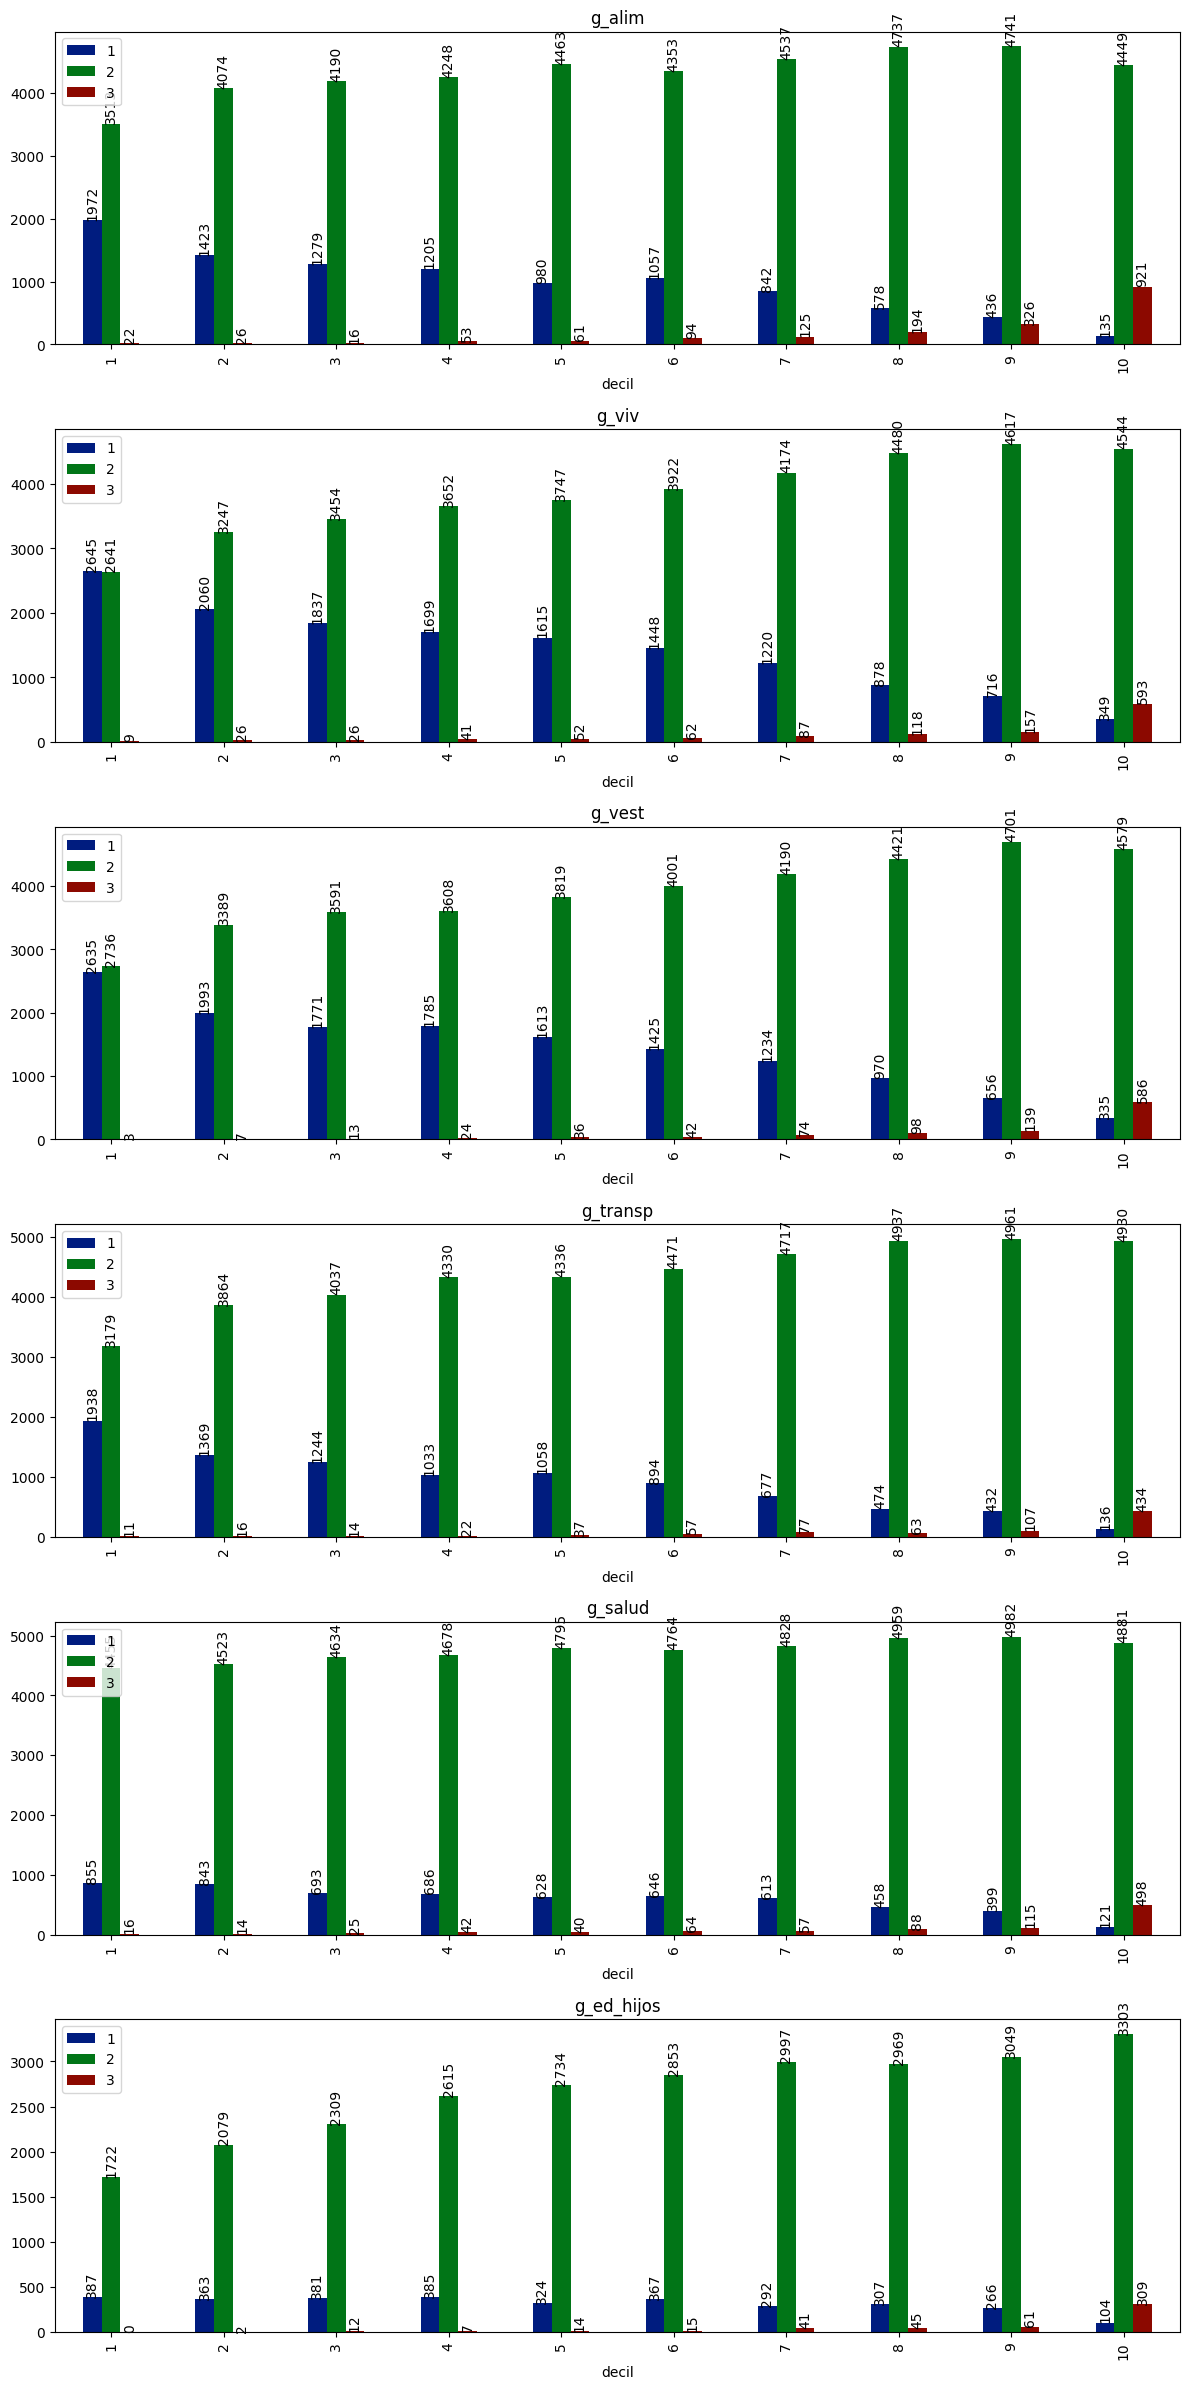

In [24]:
# Definimos las columnas con las que vamos a trabajar:
cols = ['g_alim', 'g_viv', 'g_vest', 'g_transp', 'g_salud', 'g_ed_hijos']

# Creamos una lista para guardar los datos de cada columna:
data_list = []

# Filtramos los datos para cada columna definida en 'cols' dejando que tome los valores de una lista definida y guardamos los datos en una lista:
for col in cols:
    # Filtramos los datos en las columnas:
    mask = df_g[col].isin([1, 2, 3])
    filtered_df = df_g[mask]
    
    # Agrupamos los datos por decil y columna seleccionada, despues calculamos el recuento de hogares por decil:
    data = filtered_df.groupby(['decil', col])['ID'].count().unstack()
    
    # Checkeamos si hay datos para graficar:
    if not data.empty:
        data_list.append((col, data))

# Creamos una figura con multiples graficos, uno por cada columna no-vacia:
fig, axs = plt.subplots(nrows=len(data_list), figsize=(12, 4*len(data_list)))

for i, (col, data) in enumerate(data_list):
    # Graficamos los datos en el sub-grafico actual:
    data.plot(kind='bar', ax=axs[i], title=col)
    
    # Agregamos los valores a cada columna:
    for container in axs[i].containers:
        axs[i].bar_label(container, label_type='edge', rotation=90)
    
    # Setteamos limite inferior:
    axs[i].set_ylim(bottom=0)
    
    # Movemos la leyenda a la izquierda:
    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

En los sub-gráficos anteriores, se puede comparar las 3 posibilidades cobertura de los gastos que tomamos para el analisis siendo: 0 = cobertura insuficiente, 1 = cobertura suficiente y 3 = más que suficiente. Los colores ayudan a distinguir cada una de ellas y permite comparar con más facilidad.